# Introducción

Model Fitness busca retener clientes mediante una estrategia basada en datos. Identificar la pérdida de clientes es clave, incluyendo aquellos que dejan de interactuar significativamente. Los indicadores de pérdida varían según el sector, como en un gimnasio, donde la ausencia de un cliente durante un mes puede ser preocupante. Se digitalizaron perfiles de clientes para desarrollar una estrategia efectiva de retención.

# Descarga de Datos

In [53]:
# importando librerías

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [23]:
# leyendo archivo

data= pd.read_csv("gym_churn_us.csv")

In [24]:
# examinando datos

data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


# Análisis Exploratorio

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [26]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


- Al menos el 50% de los usuarios son varones (gender=1)
- A menos el 75% de los usuarios viven cerca al gimnasio ( near_location=1)
- Al menos el 25% tienen descuento de empleados (partner=1)
- Al menos el 25% usó código promocional de amigo (Promo_friends=1)
- Al menos el 75% de los usuarios aportaron su número de celular (Phone=1)
- Al menos el 50% tiene periodo de contrato por mes.
- Al menos el 50% no participa en sesiones grupales.
- La edad de los usuarios va de 18 a 41 como máximo, el 50% de usuarios tiene entre 18 a 29 años.
- Al menos el 50% finaliza su contrato en un mes.
- El promedio de visitas por semana es de 1.87 dias.
- El 25% de usuarios tiene un frecuencia de 0.96 dias al mes.
- Al menos el 25% de usuarios cancelaron en el mes ( churn=1)








In [27]:
data_group = data.groupby(by="Churn").mean().reset_index()
display(data_group)

,Churn,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Los valores medios de periodo de contrato de Churn=0 es superior al Churn=1 (usuarios que cancelaron), teniendo un periodo mayor de tiempo por vencer con su contrato, tambien un lifetime mayor de 4.76 meses. Tiempo promedio de frecuencia por semna y  mensual mayor.

In [28]:
data_churn1=data[data["Churn"]==1]
data_churn0 = data[data["Churn"] ==0]

## Característica :  "Género" 

Text(0, 0.5, 'Cantidad')

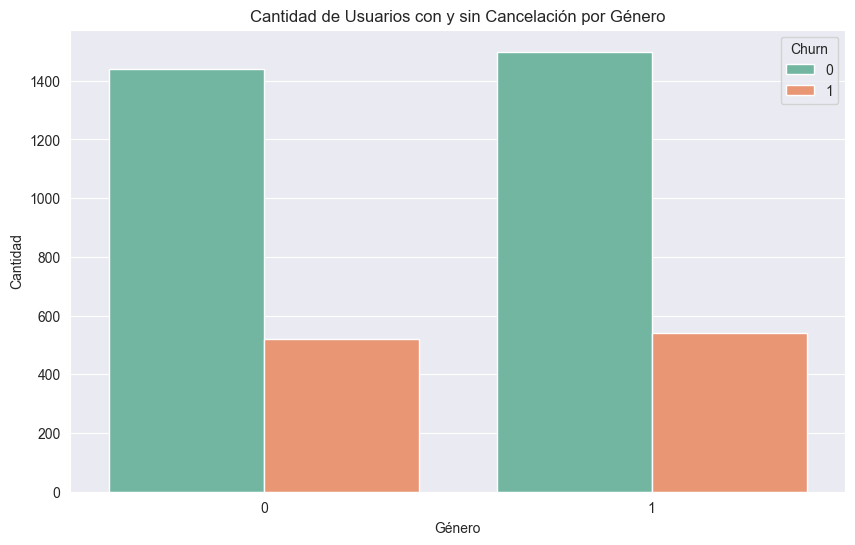

In [29]:

# Crear el histograma combinado
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras combinado
sns.countplot(data=data, x="gender", hue="Churn", palette="Set2")

plt.title('Cantidad de Usuarios con y sin Cancelación por Género')
plt.xlabel('Género')
plt.ylabel("Cantidad")

La distribución por género entre los usuarios con cancelación y sin cancelación es similar, por lo que el género no parece ser un factor influyente.

## Característica :  "Near_Location" 

Text(0, 0.5, 'Cantidad')

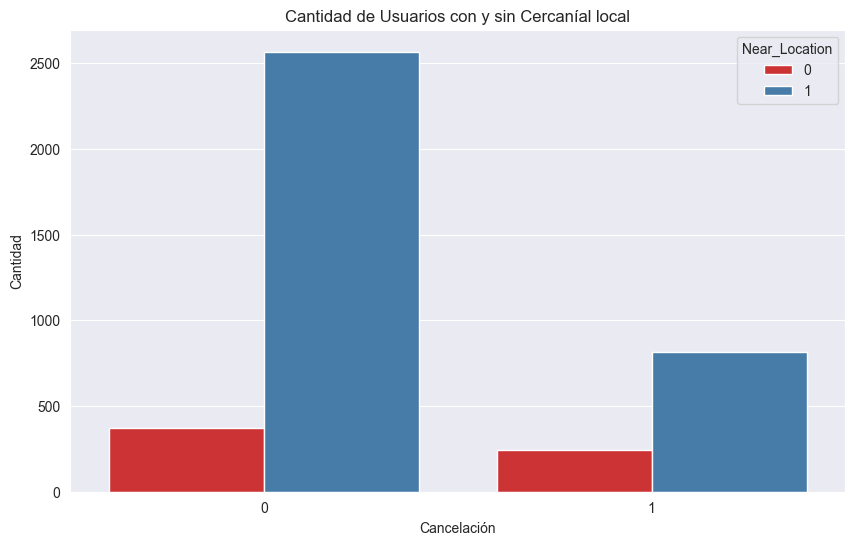

In [30]:
# Crear el histograma combinado
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras combinado
sns.countplot(data=data, x="Churn", hue="Near_Location", palette="Set1")

plt.title('Cantidad de Usuarios con y sin Cercaníal local')
plt.xlabel('Cancelación')
plt.ylabel("Cantidad")

El mayor porcentaje de usuarios sin cancelación viven cerca al local, asi como los que cancelaron.

## Característica :  "Partner" 



Text(0, 0.5, 'Cantidad')

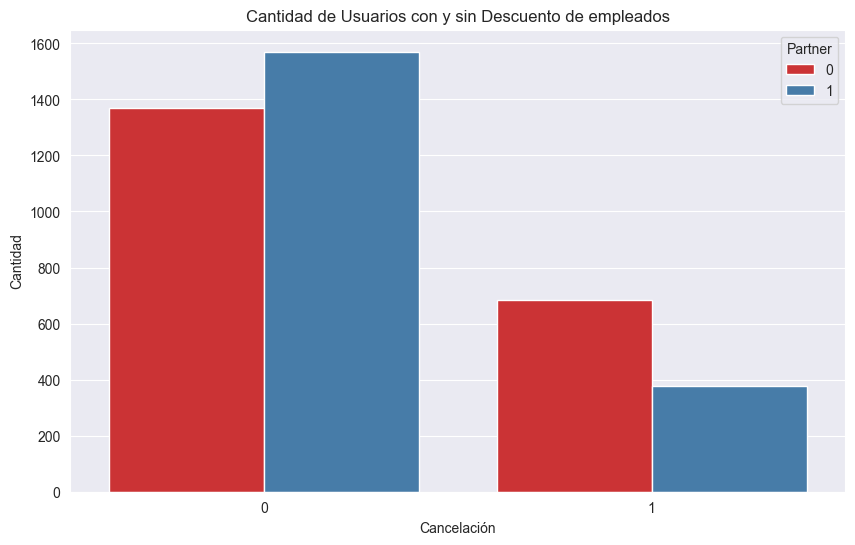

In [31]:
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras combinado
sns.countplot(data=data, x="Churn", hue="Partner", palette="Set1")

plt.title('Cantidad de Usuarios con y sin Descuento de empleados')
plt.xlabel('Cancelación')
plt.ylabel("Cantidad")

En mayor porcentaje los usuarios que tienen descuento por empleado no cancelan

## Característica :  "Promo_friends" 

Text(0, 0.5, 'Cantidad')

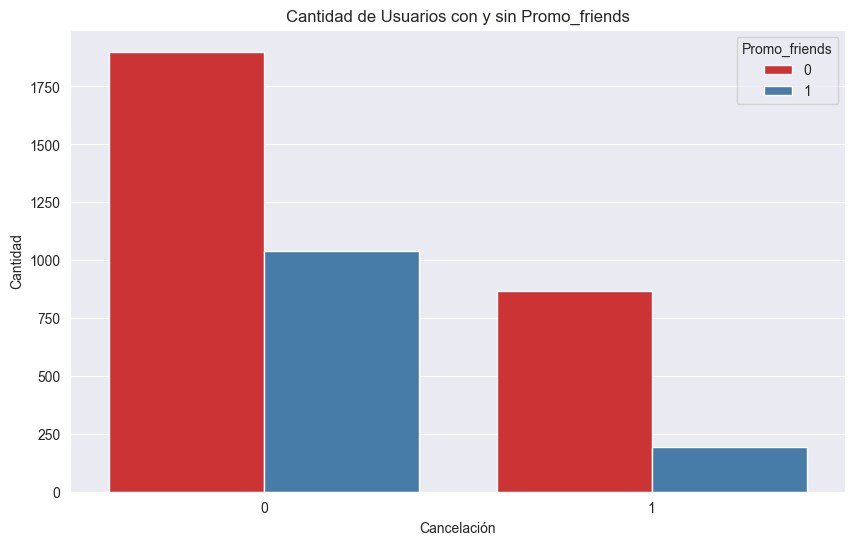

In [32]:
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras combinado
sns.countplot(data=data, x="Churn", hue="Promo_friends", palette="Set1")

plt.title('Cantidad de Usuarios con y sin Promo_friends')
plt.xlabel('Cancelación')
plt.ylabel("Cantidad")

La mayoria de usuarios nos cuenta con promo_friends, sin embargo entre los que tienen la mayoria no ha cancelado.

## Característica :  "Contract_period" 

Text(0, 0.5, 'Cantidad')

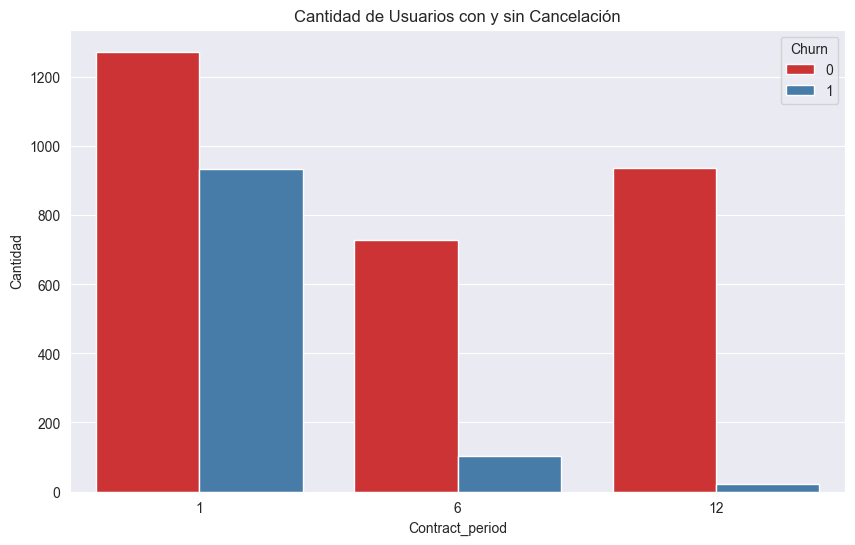

In [33]:
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras combinado
sns.countplot(data=data, x="Contract_period", hue="Churn", palette="Set1")

plt.title('Cantidad de Usuarios con y sin Cancelación')
plt.xlabel('Contract_period')
plt.ylabel("Cantidad")

Mientras mayor es el tiempo de contrato, menos han cancelado.

## Característica :  "Group_visits" 

Text(0, 0.5, 'Cantidad')

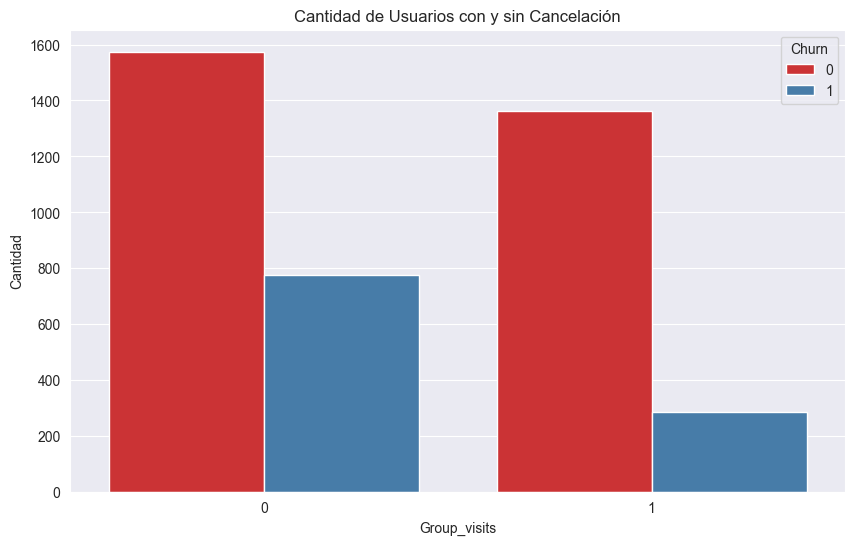

In [34]:
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras combinado
sns.countplot(data=data, x="Group_visits", hue="Churn", palette="Set1")

plt.title('Cantidad de Usuarios con y sin Cancelación')
plt.xlabel('Group_visits')
plt.ylabel("Cantidad")

Si el usuario participa en sesisones grupales o no parece afectar la desición de cancelación.

## Característica :  "Age" 

Text(0, 0.5, 'Cantidad')

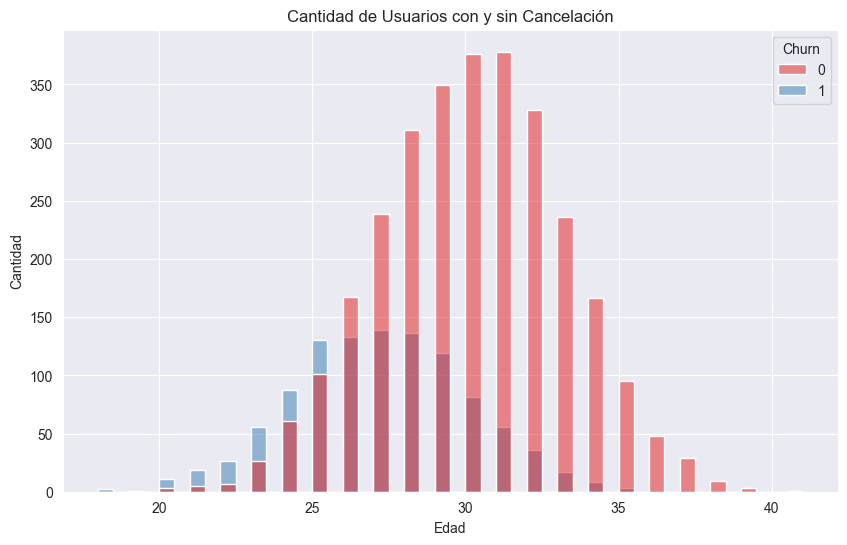

In [35]:
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras combinado
sns.histplot(data=data, x="Age", hue="Churn", palette="Set1")

plt.title('Cantidad de Usuarios con y sin Cancelación')
plt.xlabel('Edad')
plt.ylabel("Cantidad")

Los usuarios mayores a 35 años no suelen realizar cancelaciones, el rango de usuarios que tuvo mas cancelaciones tienes entre 25 y 30 años.

## Característica :  "Avg_additional_charges_total" 

Text(0, 0.5, 'Cantidad')

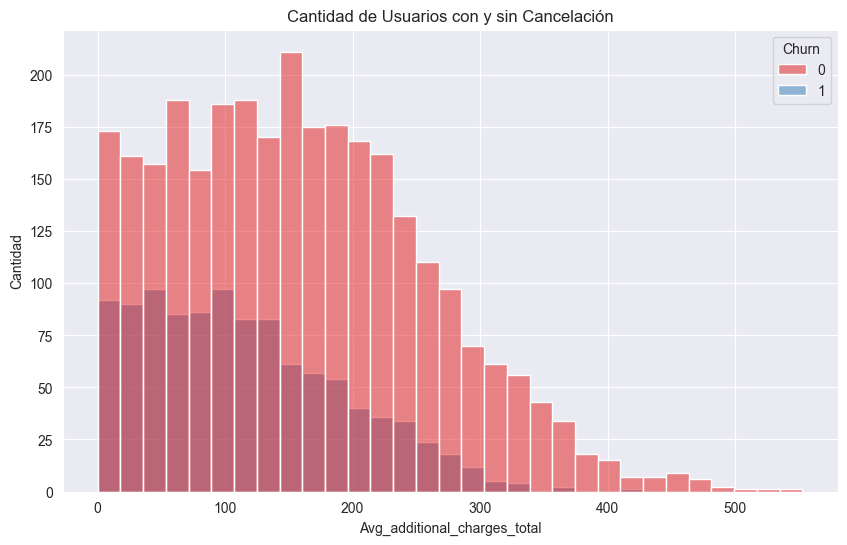

In [36]:
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras combinado
sns.histplot(data=data, x="Avg_additional_charges_total", hue="Churn", palette="Set1")

plt.title('Cantidad de Usuarios con y sin Cancelación')
plt.xlabel('Avg_additional_charges_total')
plt.ylabel("Cantidad")

Los clientes con gastos adicionales a 300 no suelen realizar cancelaciones

## Característica :  "Month_to_end_contract" 

Text(0, 0.5, 'Cantidad')

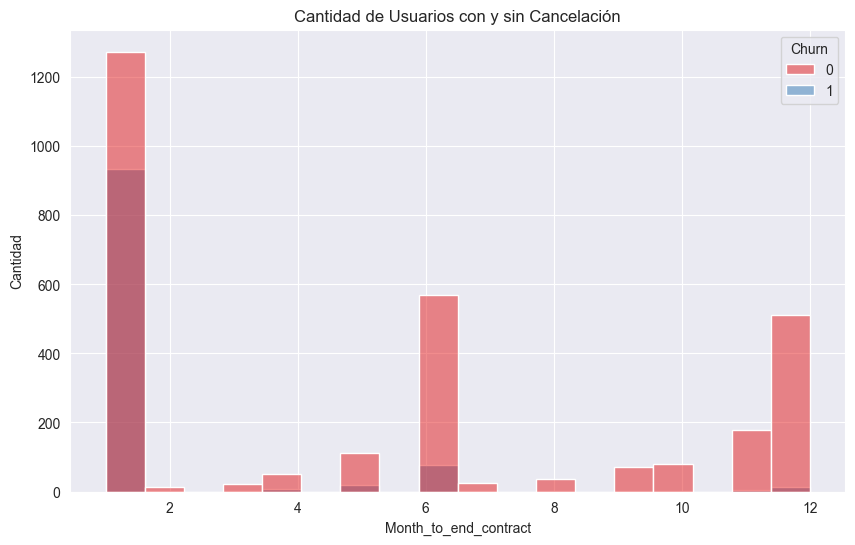

In [37]:
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras combinado
sns.histplot(data=data, x="Month_to_end_contract",
             hue="Churn", palette="Set1")

plt.title('Cantidad de Usuarios con y sin Cancelación')
plt.xlabel('Month_to_end_contract')
plt.ylabel("Cantidad")

Los usuarios con un mes pendiente para que expire el contrato son los que cancelan con más frecuencia.

## Característica : Avg_class_frequency_current_month

Text(0, 0.5, 'Cantidad')

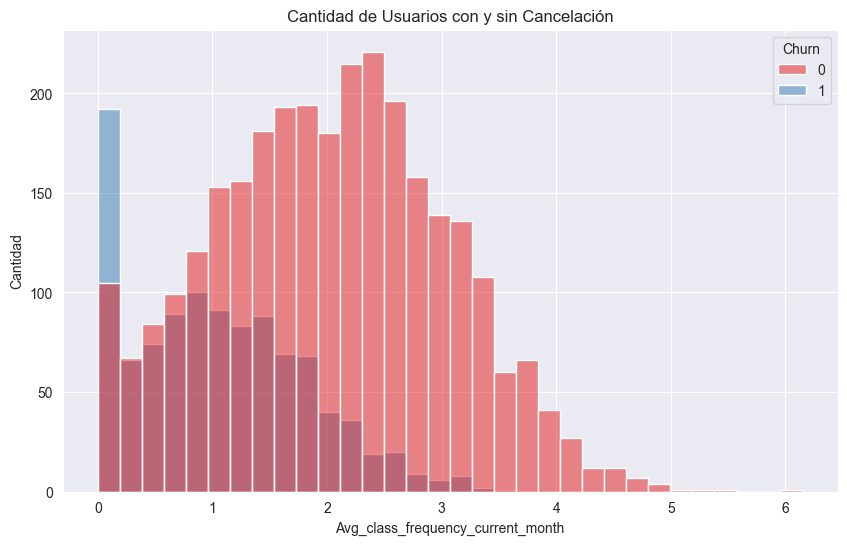

In [38]:
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras combinado
sns.histplot(data=data, x="Avg_class_frequency_current_month",
             hue="Churn", palette="Set1")

plt.title('Cantidad de Usuarios con y sin Cancelación')
plt.xlabel('Avg_class_frequency_current_month')
plt.ylabel("Cantidad")

Los usuarios que tienen un promedio de visitas superior a 3 son los que no cancelan.
Y los que más cancelan tiene un promedio de 0 a 2 visitas por mes.

# Matriz de correlación

<Axes: >

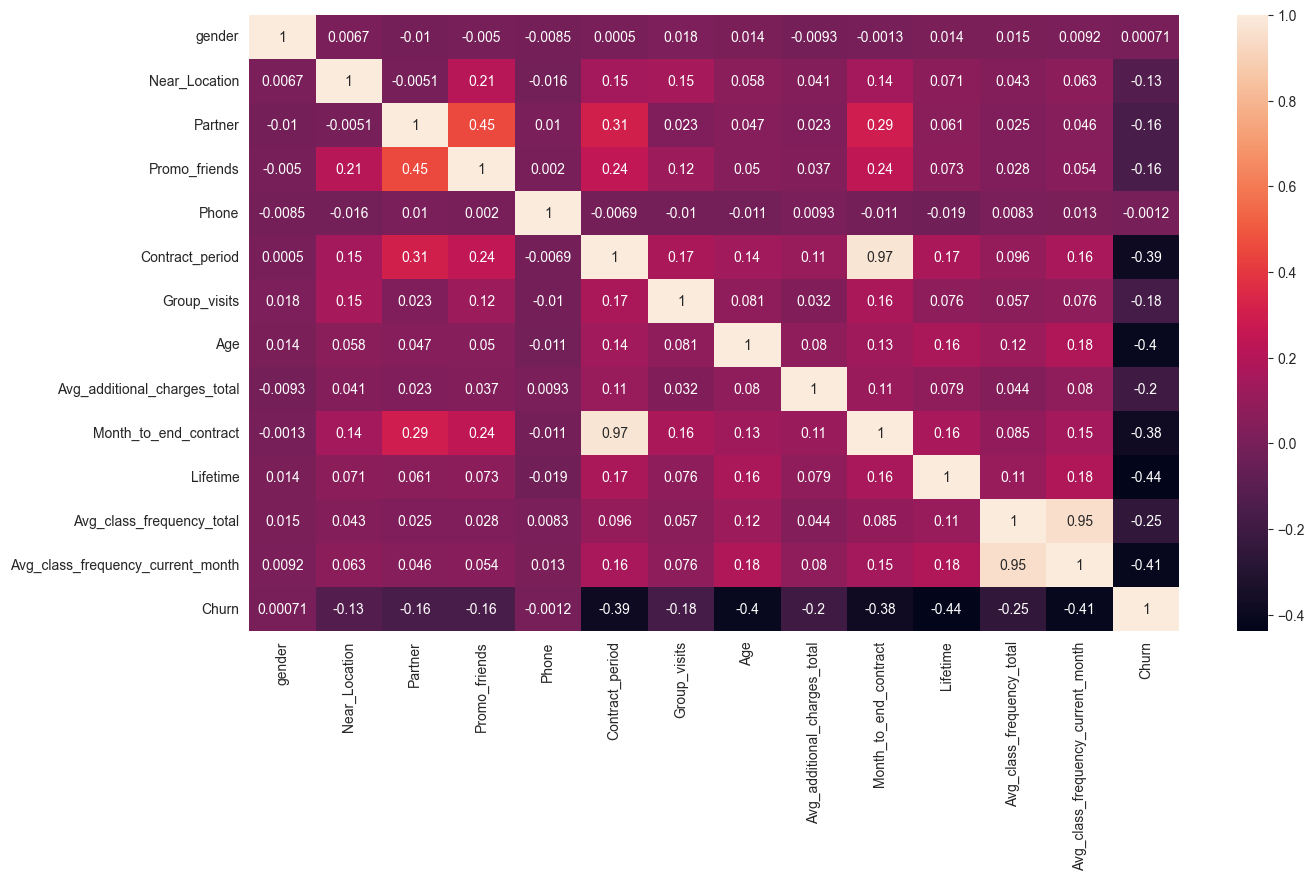

In [39]:
data.corr() # correlación entre variables

sns.set({'figure.figsize':(15,8)}) # modificar tamaño de gráfico
sns.heatmap(data.corr(),annot=True) #  grafico con anotaciones


La cancelación del contrato no parece tener una fuerte relación con ninguna de las caracteríticas.
La característica de meses para finalizar el contrato y la duración del contrato se relacionan directamente (0.97), asi como el promedio de frecuencia total, con el promedio de frecuencia por mes.

# Construir un modelo para predecir la cancelación de usuarios

Modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.

In [48]:
# divide los datos en características (la matriz X) y una variable objetivo (y)

X = data.drop('Churn', axis=1)
y = data['Churn']

# divide los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# define el algoritmo del modelo
model = LogisticRegression(max_iter=1000, random_state=0)

# entrena tu modelo
model.fit(X_train, y_train)

# utiliza el modelo entrenado para hacer previsiones
probabilities = model.predict_proba(X_test)[:, 1]

# predicción binaria
predictions = model.predict(X_test)

# muestra todas las métricas 
print('Métricas para la predicción automática realizada con Regresión Logística')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}\n'.format(f1_score(y_test, predictions)))


# define el algoritmo del modelo
model = RandomForestClassifier(random_state=0)
# Entrena el modelo
model.fit(X_train, y_train)

# Utiliza el modelo entrenado para hacer previsiones
predictions = model.predict(X_test)

# Muestra todas las métricas 
print('Métricas para la predicción automática realizada con bosque aleatorio')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}\n'.format(f1_score(y_test, predictions)))

Métricas para la predicción automática realizada con Regresión Logística
Accuracy: 0.92
Precision: 0.86
Recall: 0.83
F1: 0.84

Métricas para la predicción automática realizada con bosque aleatorio
Accuracy: 0.92
Precision: 0.84
Recall: 0.82
F1: 0.83



Ambos modelos tienen la misma exactitud (accuracy) del 92%, lo que significa que ambos modelos clasifican correctamente el mismo porcentaje de muestras.La regresión logística tiene una precisión ligeramente superior, lo que significa que tiene menos falsos positivos que el bosque aleatorio.
La regresión logística también tiene un recall ligeramente superior, lo que significa que detecta mejor los casos positivos (menos falsos negativos) en comparación con el bosque aleatorio.
La F1 score, que es la media armónica de la precisión y el recall, es ligeramente superior para la regresión logística. Esto sugiere que la regresión logística tiene un mejor balance entre precisión y recall.
En resumen, con las métricas proporcionadas, se podría inferir que la regresión logística es ligeramente mejor para este conjunto de datos específico.

# Clústeres de usuarios/as

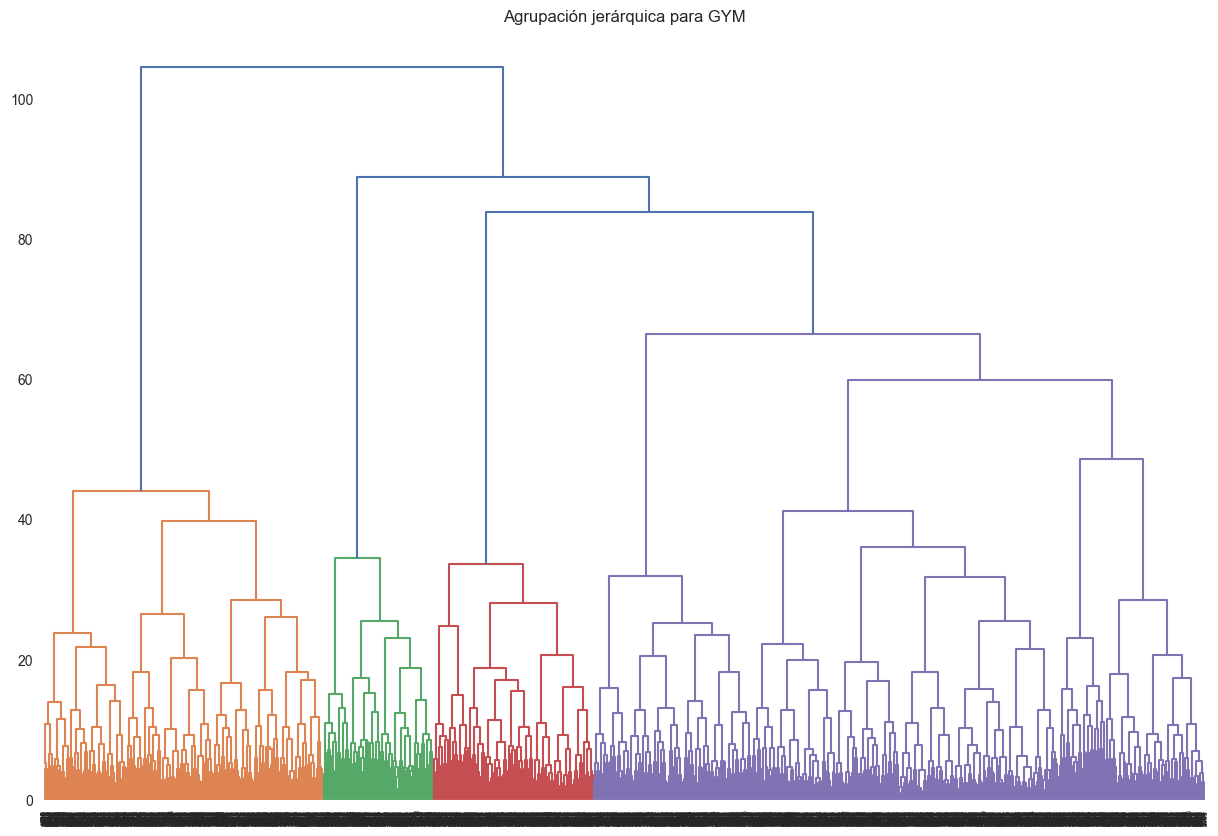

In [52]:
scaler = StandardScaler()  # crear un objeto de clase scaler (normalizador)

x_sc = scaler.fit_transform(data.drop(columns=['Churn'])) # entrenar el normalizador y transformar el conjunto de datos

linked = linkage(x_sc, method='ward')

plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica para GYM')
plt.show()

In [54]:
# define el modelo k_means con 5 clústeres
km = KMeans(n_clusters=5)
# predice los clústeres para las observaciones (el algoritmo les asigna un número de 0 a 4)
labels = km.fit_predict(x_sc)

# almacena etiquetas de clúster en el campo de nuestro conjunto de datos
data['cluster'] = labels

# obtiene las estadísticas de los valores medios de las características por clúster
data.groupby("cluster").mean()

C:\Users\LUCIA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.486574,0.716029,0.301871,0.018714,1.0,1.908869,0.275834,28.088690,129.536737,1.816924,2.194467,1.227324,0.970398,0.572010
1,0.500577,0.936563,0.738178,0.478662,1.0,11.854671,0.546713,29.889273,163.418253,10.798155,4.677047,2.007471,1.999303,0.021915
2,0.501582,0.949367,0.829114,0.998418,1.0,3.083861,0.447785,29.118671,141.840116,2.884494,3.770570,1.769836,1.668512,0.246835
3,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
4,0.553047,0.853273,0.259594,0.053047,1.0,2.604966,0.437923,30.011287,159.800593,2.425508,4.788939,2.746003,2.733908,0.090293


* El cluster 0, tiene un valor medio superior al resto en "Churn".
* El cluster 0 y 4 tienen los valores más bajo es Partner y Promo_friends
* El cluster 3, no da la información de su telefono.
* El cluster 1 tiene el mayor tiempo de contract_period.

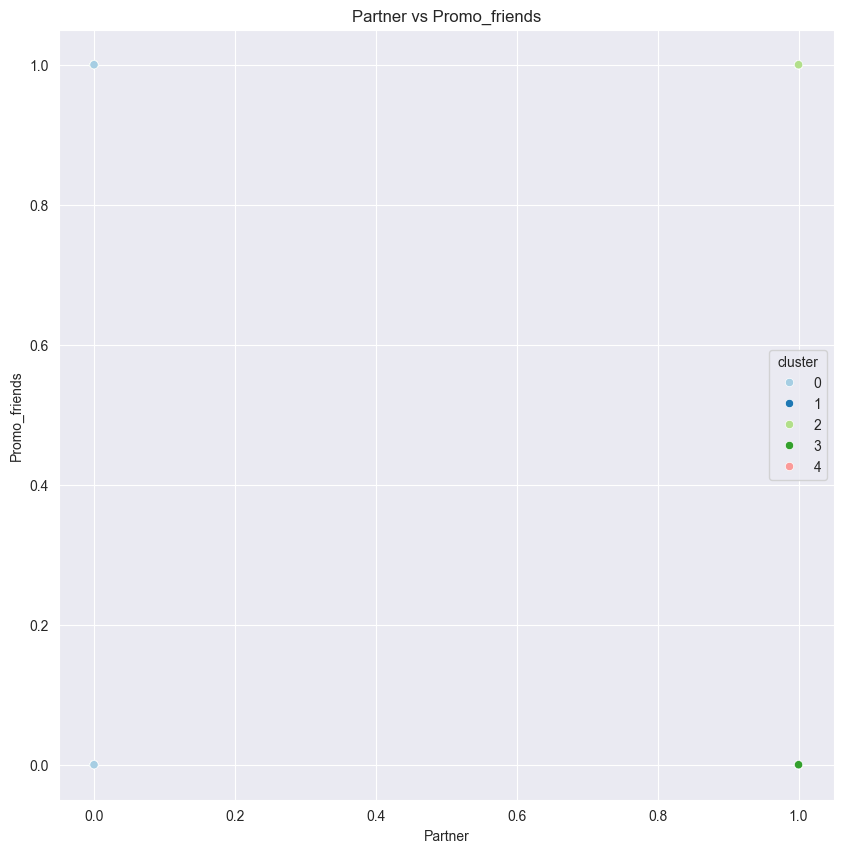

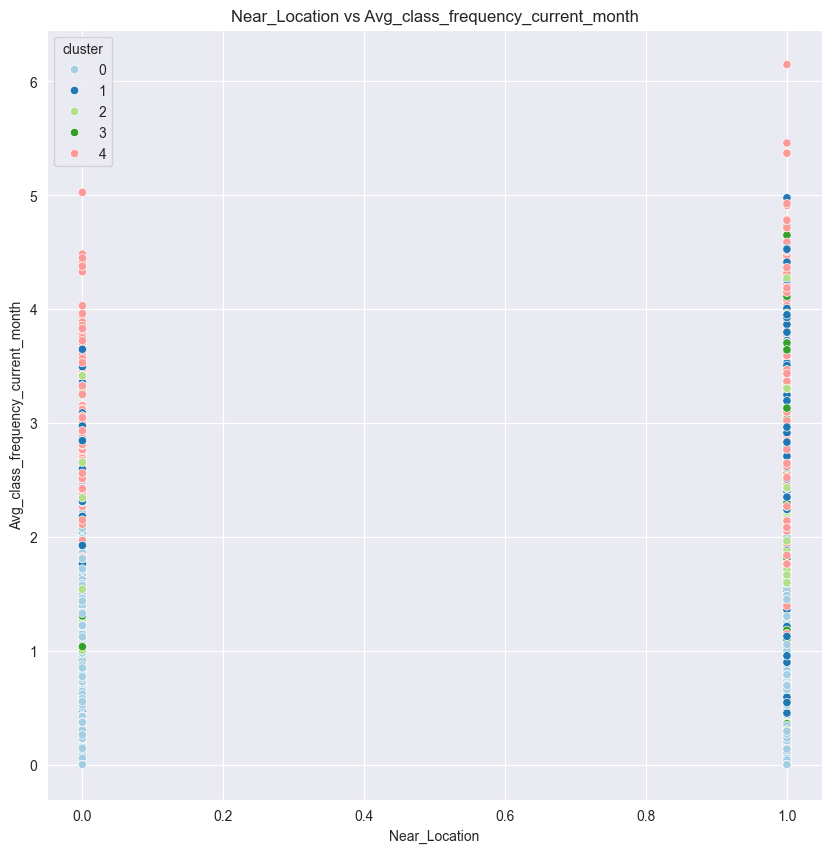

In [63]:
# define la función para representar gráficos de características pareadas para los clústeres
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x=df[x_name], y=df[y_name],hue=df[cluster_name], palette='Paired')
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()


show_clusters_on_plot(data, "Partner", "Promo_friends","cluster")

show_clusters_on_plot(data, "Near_Location",
                      "Avg_class_frequency_current_month", "cluster")



In [65]:
data.groupby("cluster").mean().reset_index()[["cluster", "Churn"]]

,cluster,Churn
0,0,0.572010
1,1,0.021915
2,2,0.246835
3,3,0.266839
4,4,0.090293


Los clientes más leales se encuentran en el cluster 1.

# Conclusiones y recomendaciones

Conclusiones:

El modelo que más se ajusta para predecir la cancelación de usuarios es el de Regresión Logística porque tienes mejores resultados en sus métricas.

Los clientes se han segmentado en 5 clustures de acuerdo a sus caracteristicas, siendo el cluster 0 el que tiene mayor tasa de cancelación, y en el cluster 1 se encuentran los clientes más leales, teniendo este el promedio mayor de tiempo de contrato, promedio de cargos adicionales y promedio de participaciones grupales.

Se recomienda lanzar promociones que permitan a los clientes optar por contratos con mayor tiempo de duración.

Recomendaciones:

Ofrecer descuentos atractivos para contratos a largo plazo (6 meses, 1 año o más). Esto podría ser en forma de tarifas reducidas o servicios adicionales gratuitos.

Implementar un programa de recompensas donde los clientes acumulan puntos por cada mes de membresía, consumo de servicios adicionales, y participación en actividades grupales. Los puntos se pueden canjear por descuentos, productos de merchandising, o servicios gratuitos.

Organizar eventos exclusivos para miembros leales, como sesiones de entrenamiento con entrenadores destacados, talleres de bienestar, o eventos sociales.

 Aumentar la oferta y la variedad de clases grupales para atraer a diferentes perfiles de clientes. Esto puede incluir yoga, pilates, entrenamiento funcional, y más.

Ofrecer paquetes que combinen la membresía del gimnasio con servicios adicionales como masajes, nutrición, o entrenamiento personal a tarifas reducidas.
Proporcionar pruebas gratuitas de servicios adicionales a nuevos miembros para fomentar su uso y demostrar su valor.

Usar el modelo predictivo para identificar clientes en riesgo de cancelación y actúa proactivamente con ofertas personalizadas para incentivarlos a quedarse.

Implementar planes de fidelización con beneficios escalonados según la antigüedad del cliente, incentivando así a los miembros a continuar con su suscripción.




